In [ ]:
import os
import gzip
import sys
import numpy as np
import torch
import torch.nn as nn
import copy
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
import cvxpy as cp
import numpy as np
from random import randrange
import matplotlib.pyplot as plt

In [ ]:
def compute_loss(W, X, y, reg):
  
  loss=0.0
  gradient=np.zeros(W.shape) 
  num_classes=W.shape[1] 
  num_train=X.shape[0]
  scores=X.dot(W)
  correct_class_scores=scores[np.arange(num_train),y].reshape(num_train,1)
  margin=np.maximum(0,scores-correct_class_scores+1)
  margin[np.arange(num_train),y] = 0
  loss=margin.sum()/num_train
  loss+=reg*np.sum(W*W) 

  margin[margin>0]=1
  valid_margin_count=margin.sum(axis=1)
  margin[np.arange(num_train),y]-=valid_margin_count
  gradient=(X.T).dot(margin)/num_train

  gradient=gradient+reg*2*W 

  return loss,gradient


class LinearClassifier(object):
    def predict(self, X):
        y_pred = np.zeros(X.shape[0]) #Predicted labels
        scores=X.dot(self.W)
        y_pred=scores.argmax(axis=1)
        return y_pred

    def __init__(self):
        self.W = None

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100, batch_size=200, verbose=False):
        num_train, dim=X.shape
        num_classes=np.max(y)+1
        if self.W is None:
          self.W=0.001*np.random.randn(dim, num_classes) 

        
        loss_history=[] 
        for it in range(num_iters):
          X_batch=None
          y_batch=None
          batch_indices=np.random.choice(num_train, batch_size, replace=False)
          X_batch=X[batch_indices]
          y_batch=y[batch_indices]

          
          loss, grad=self.loss(X_batch, y_batch, reg) 
          loss_history.append(loss)

          
          self.W=self.W-learning_rate*grad  
          if it%1000==0: 
            y_train_pred=self.predict(X_test)
            plotnum1.append((np.mean(Y_test==y_train_pred),))
            plt.plot()
        return loss_history


class LinearSVM(LinearClassifier):

      def loss(self, X_batch, y_batch, reg):
        return compute_loss(self.W, X_batch, y_batch, reg)




11501568/11490434 [==============================] - 0s 0us/step
Loss--> 8.711028244269437


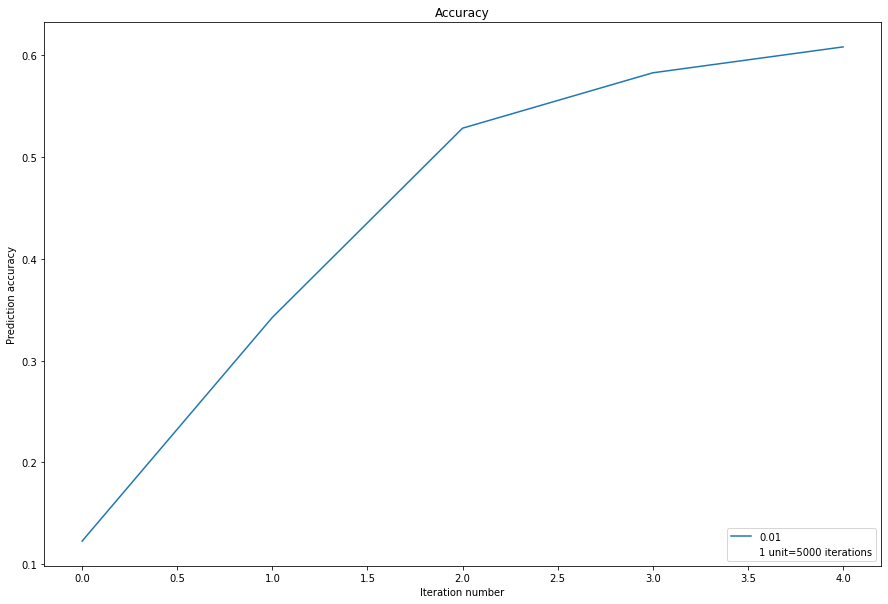

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


X_train = X_train/255.0
X_train =X_train.reshape(60000,784)

X_test =  X_test / 255.0
X_test = X_test.reshape(10000,784)



X_train= np.asarray(X_train).astype(np.float32)
Y_train=np.asarray(Y_train).astype(np.int32)
X_test=np.asarray(X_test).astype(np.float32)
Y_test=np.asarray(Y_test).astype(np.int32)


W = np.random.randn(784, 10)*0.0001 
plotnum1=[]


plt.figure(figsize=(15,10))
plt.title('Accuracy')
plt.xlabel('Iteration number')
plt.ylabel('Prediction accuracy')
plotnum1.clear()
svm=LinearSVM()
loss_hist=svm.train(X_train, Y_train, learning_rate=1e-6, reg=0.01, num_iters=5000, verbose=True)
print("Loss-->",np.mean(loss_hist))
plt.plot(plotnum1,label='0.01')
plt.plot([], [], ' ', label="1 unit=5000 iterations")
plt.legend(loc="lower right")
plt.show()